In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
plt.set_cmap("gray")

<Figure size 432x288 with 0 Axes>

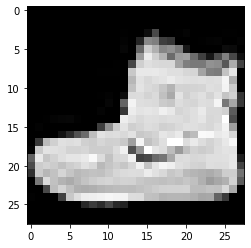

In [6]:
plt.imshow(x_train[0])

In [7]:
x_train.max()

255

In [8]:
x_train = (x_train/255. - 0.5) * 2.
x_test = (x_test/255. - 0.5) * 2.

In [9]:
x_train.min()

-1.0

In [10]:
# MI RED

In [11]:
from sklearn.decomposition import PCA
pca = PCA().fit(x_train.reshape(-1, 28*28))

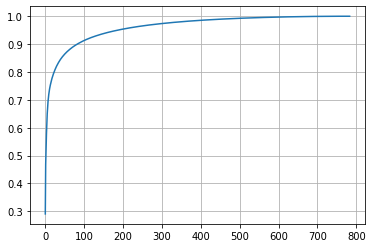

In [12]:
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.grid()
plt.show()

In [13]:
# 50 parece un buen valor para zdim

In [14]:
z_dim = 50
h_dim = 100

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Reshape

In [16]:
encoder = Sequential([
      Flatten(input_shape=(28,28,)),
      Dense(h_dim, activation="relu"),
      Dense(z_dim)                               
])

In [17]:
encoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
Total params: 83,550
Trainable params: 83,550
Non-trainable params: 0
_________________________________________________________________


In [18]:
encoder.predict(x_train[:1])

array([[-0.01473531,  0.34117895, -0.86857074,  0.12214816, -0.6150135 ,
        -0.35353422,  0.67738414, -0.71660566, -2.0779743 , -0.4580211 ,
        -1.1113421 ,  0.3832841 , -0.42409477,  0.949834  ,  0.07136133,
         2.2965724 ,  0.19712418, -1.1660485 , -0.527852  , -0.15662912,
         2.1399782 , -1.5917526 ,  1.3823409 ,  1.8755567 ,  0.13865188,
        -0.15657894,  1.5141146 ,  0.14558086,  1.1632288 , -1.3728564 ,
        -0.15463868, -0.9970404 ,  1.1644491 , -1.8066411 ,  1.0479724 ,
        -0.18677899, -1.3393118 , -0.9932043 ,  0.8944868 , -0.88668   ,
        -0.45248297, -0.5813893 , -1.5203023 , -1.1373575 ,  0.6252365 ,
         0.21885571,  0.7565783 ,  0.8514931 ,  0.01812148,  0.35138017]],
      dtype=float32)

In [19]:
decoder = Sequential([
                      Dense(h_dim, activation="relu", input_shape=(z_dim,)),
                      Dense(28*28, activation="tanh"),
                      Reshape((28,28))
])

In [20]:
decoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               5100      
                                                                 
 dense_3 (Dense)             (None, 784)               79184     
                                                                 
 reshape (Reshape)           (None, 28, 28)            0         
                                                                 
Total params: 84,284
Trainable params: 84,284
Non-trainable params: 0
_________________________________________________________________


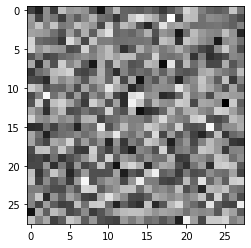

In [21]:
import numpy as np
plt.imshow(decoder.predict(np.random.randn(1,z_dim))[0])

In [24]:
decoder.predict(np.random.randn(1,z_dim))[0].min()

-0.8864321

In [25]:
encoder

In [26]:
decoder

In [27]:
autoencoder = Sequential([encoder, decoder])

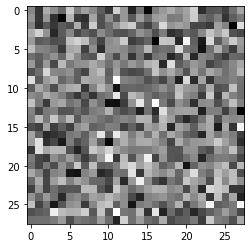

In [29]:
plt.imshow(autoencoder.predict(x_train[:1])[0])

In [33]:
# from keras.optimizer_v1 import adam
# optimizer = adam()
autoencoder.compile(optimizer="adam", loss="mse")

In [34]:
autoencoder.fit(x_train, x_train, batch_size=128, epochs=50, validation_data = (x_test, x_test))

Epoch 1/50
469/469 [==============================] - 4s 5ms/step - loss: 0.1047 - val_loss: 0.0632
Epoch 2/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0562 - val_loss: 0.0517
Epoch 3/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0485 - val_loss: 0.0467
Epoch 4/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0447 - val_loss: 0.0437
Epoch 5/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0424 - val_loss: 0.0419
Epoch 6/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0406 - val_loss: 0.0405
Epoch 7/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0394 - val_loss: 0.0394
Epoch 8/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0384 - val_loss: 0.0384
Epoch 9/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0376 - val_loss: 0.0377
Epoch 10/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0369 - val_loss: 0.0371

In [37]:
# me asigno el resultado anterior a history con efecto retroactivo (se me olvidó)
history = Out[34]

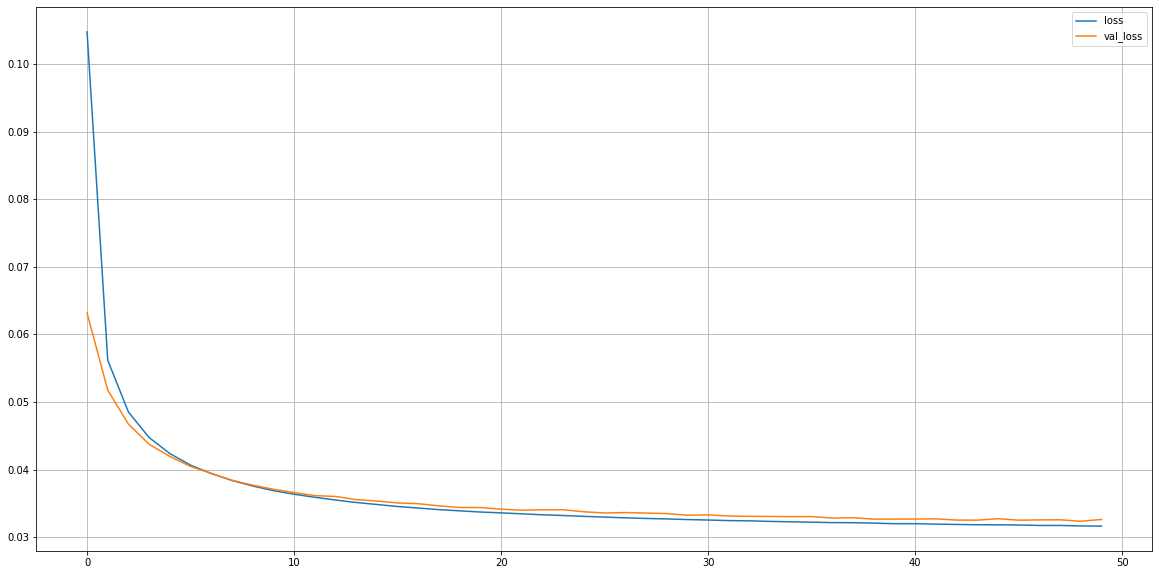

In [42]:
plt.figure(figsize=(20, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.grid()
plt.show()


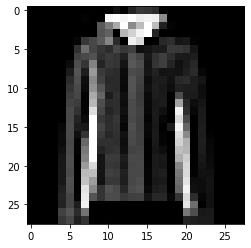

In [44]:
plt.imshow(x_test[6])

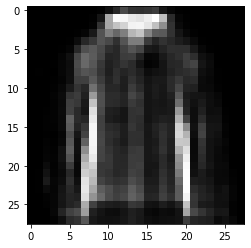

In [45]:
plt.imshow(autoencoder.predict(x_test[6:7])[0])

In [47]:
z_example = encoder.predict(x_test[6:7])
z_example

array([[-0.6451565 ,  0.581091  , -0.06221061, -2.152991  ,  3.3714972 ,
        -1.8770629 ,  1.8265773 ,  0.7424184 , -0.7656427 , -1.0217836 ,
        -0.9572251 , -2.342099  ,  0.7939077 ,  1.6283444 ,  2.693824  ,
        -1.66099   , -1.3802518 , -1.5908589 , -1.2961442 ,  0.39505342,
         1.8196497 , -1.3939022 ,  0.59896725, -0.21773556,  2.0651736 ,
        -1.364139  , -1.3132001 ,  0.4253525 ,  1.90491   ,  1.8963128 ,
        -3.8528895 ,  0.43303192, -0.02911025, -0.3961407 ,  1.857577  ,
        -1.118506  , -1.6088394 ,  0.44372827, -1.2921171 , -2.0279794 ,
         0.62461025, -0.7403786 , -0.15576228,  4.631781  , -0.10269183,
        -1.5816964 ,  0.94262725, -1.2038715 , -3.0302348 , -0.1584455 ]],
      dtype=float32)

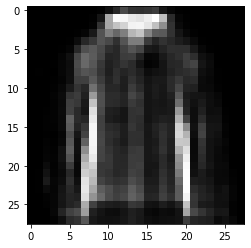

In [48]:
plt.imshow(decoder.predict(z_example)[0])

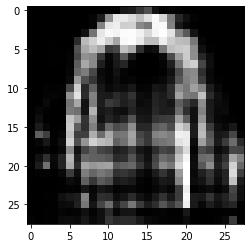

In [62]:
plt.imshow(decoder.predict(z_example + np.random.randn(1, z_dim)*2.)[0])

In [63]:
z_tests = encoder.predict(x_test)

In [64]:
z_visualizacion = PCA(n_components=2).fit_transform(z_tests)

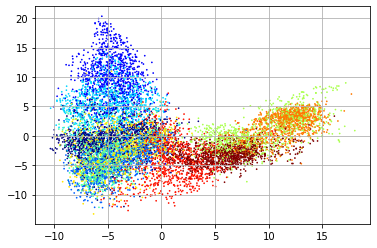

In [68]:
plt.scatter(z_visualizacion[:, 0], z_visualizacion[:, 1], s=0.5, c=y_test, cmap='jet')
plt.grid()

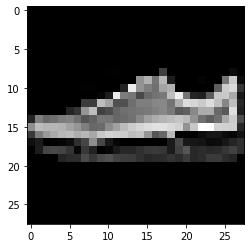

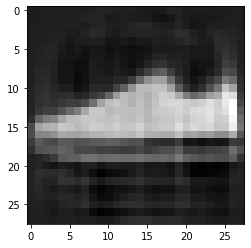

In [76]:
# comparamos el error de validación con el error de PCA con 50

# pca
pcamod = PCA(n_components = z_dim).fit(x_test.reshape(-1, 28*28))
x_test_pca = pcamod.transform(x_test.reshape(-1, 28*28))
x_test_rec_pca = pcamod.inverse_transform(x_test_pca).reshape(-1, 28, 28)

plt.figure()
plt.imshow(x_test[9])
plt.figure()
plt.imshow(x_test_rec_pca[9])

In [78]:
error_pca = ((x_test_rec_pca - x_test)**2).mean() # equivalente a mse
print("error pca", error_pca)

error pca 0.047510777541644095


In [79]:
x_test_rec_autoencoder = autoencoder.predict(x_test)
error_autoencoder = ((x_test_rec_autoencoder - x_test)**2).mean() # equivalente a mse
print("error autoencoder", error_autoencoder)

error autoencoder 0.03261634711134171


In [80]:
error_autoencoder/error_pca

0.6865041744002793

In [81]:
## MI RED PERO EN CONVOLUCIONAL. A VER QUÉ TAL

In [82]:
z_dim = 50

In [83]:
from keras.layers import Conv2D, Conv2DTranspose

In [193]:
encoder2d = Sequential([
                        Reshape((28, 28, 1, ), input_shape=(28,28,)),
                        Conv2D(32, kernel_size=3, strides=2, padding="valid", activation="relu"),
                        Conv2D(40, kernel_size=3, strides=2, padding="valid", activation="relu"),
                        Flatten(),
                        Dense(z_dim)
])

In [194]:
encoder2d.summary()

Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_53 (Reshape)        (None, 28, 28, 1)         0         
                                                                 
 conv2d_54 (Conv2D)          (None, 13, 13, 32)        320       
                                                                 
 conv2d_55 (Conv2D)          (None, 6, 6, 40)          11560     
                                                                 
 flatten_19 (Flatten)        (None, 1440)              0         
                                                                 
 dense_52 (Dense)            (None, 50)                72050     
                                                                 
Total params: 83,930
Trainable params: 83,930
Non-trainable params: 0
_________________________________________________________________


In [134]:
encoder2d.predict(x_train[4:5])

array([[ 0.12229221, -0.03692132, -0.1604191 , -0.09807018, -0.0059297 ,
         0.2233676 ,  0.21887691,  0.01745611,  0.11237974,  0.05876754,
        -0.01415458,  0.17165425, -0.03147751,  0.0568351 , -0.05825658,
         0.04755082,  0.1225936 , -0.12308139,  0.03963492,  0.20256874,
         0.0708648 ,  0.07803531, -0.11937489,  0.04817065,  0.00359943,
         0.01758676, -0.01192514, -0.11720018, -0.11181046,  0.15606767,
        -0.06413747, -0.1246777 , -0.16545033,  0.06610877,  0.0665048 ,
         0.04731194,  0.13974568,  0.10255379,  0.07442464,  0.1293292 ,
         0.0730038 , -0.07107377,  0.02330282, -0.10545108,  0.05923202,
         0.17142737, -0.06927622, -0.0061407 ,  0.04534897,  0.03479587]],
      dtype=float32)

In [201]:
h1 = 29
decoder2d = Sequential([
                       Dense(7 * 7 * h1, activation="relu", input_shape=(z_dim,)),
                       Reshape((7, 7, h1)),
                       Conv2DTranspose(42, kernel_size=3, strides=2, padding="same", activation="relu"),
                       Conv2DTranspose(1, kernel_size=3, strides=2, padding="same", activation="tanh"),
                       Reshape((28,28))
])

In [202]:
decoder2d.summary()

Model: "sequential_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 1421)              72471     
                                                                 
 reshape_57 (Reshape)        (None, 7, 7, 29)          0         
                                                                 
 conv2d_transpose_41 (Conv2D  (None, 14, 14, 42)       11004     
 Transpose)                                                      
                                                                 
 conv2d_transpose_42 (Conv2D  (None, 28, 28, 1)        379       
 Transpose)                                                      
                                                                 
 reshape_58 (Reshape)        (None, 28, 28)            0         
                                                                 
Total params: 83,854
Trainable params: 83,854
Non-tra

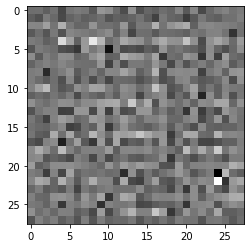

In [206]:
plt.imshow(decoder2d.predict(np.random.randn(1, z_dim))[0])

In [207]:
autoencoder2d = Sequential([encoder2d, decoder2d])
autoencoder2d.compile(optimizer="adam", loss="mse")

In [208]:
history = autoencoder2d.fit(x_train, x_train, batch_size=128, validation_data=(x_test, x_test), epochs=50)

Epoch 1/50
469/469 [==============================] - 7s 12ms/step - loss: 0.1207 - val_loss: 0.0575
Epoch 2/50
469/469 [==============================] - 5s 10ms/step - loss: 0.0491 - val_loss: 0.0438
Epoch 3/50
469/469 [==============================] - 5s 11ms/step - loss: 0.0397 - val_loss: 0.0372
Epoch 4/50
469/469 [==============================] - 5s 11ms/step - loss: 0.0353 - val_loss: 0.0344
Epoch 5/50
469/469 [==============================] - 5s 10ms/step - loss: 0.0329 - val_loss: 0.0323
Epoch 6/50
469/469 [==============================] - 5s 11ms/step - loss: 0.0313 - val_loss: 0.0312
Epoch 7/50
469/469 [==============================] - 5s 11ms/step - loss: 0.0301 - val_loss: 0.0301
Epoch 8/50
469/469 [==============================] - 5s 11ms/step - loss: 0.0293 - val_loss: 0.0294
Epoch 9/50
469/469 [==============================] - 5s 11ms/step - loss: 0.0286 - val_loss: 0.0289
Epoch 10/50
469/469 [==============================] - 5s 10ms/step - loss: 0.0281 - val_lo

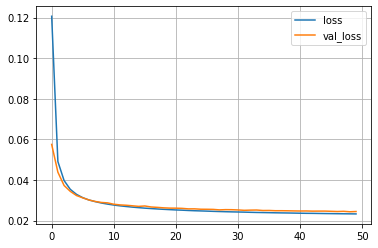

In [209]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.grid()
plt.show()

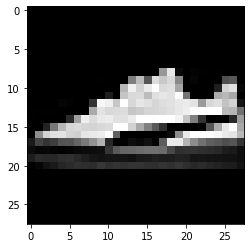

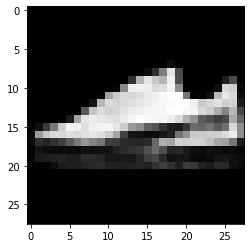

In [211]:
plt.figure()
plt.imshow(x_test[36])
plt.figure()
plt.imshow(autoencoder2d.predict(x_test[36:37])[0])

In [212]:
error_pca = ((x_test_rec_pca - x_test)**2).mean() # equivalente a mse
print("error pca", error_pca)

error pca 0.047510777541644095


In [213]:
x_test_rec_autoencoder = autoencoder.predict(x_test)
error_autoencoder = ((x_test_rec_autoencoder - x_test)**2).mean() # equivalente a mse
print("error autoencoder denso", error_autoencoder)

error autoencoder denso 0.03261634711134171


In [214]:
x_test_rec_autoencoder = autoencoder2d.predict(x_test)
error_autoencoder2d = ((x_test_rec_autoencoder - x_test)**2).mean() # equivalente a mse
print("error autoencoder conv", error_autoencoder2d)

error autoencoder conv 0.024433769589529523


In [215]:
error_autoencoder2d/error_autoencoder

0.7491264888161908

In [216]:
error_autoencoder2d/error_pca

0.5142784617261391

In [ ]:
error_autoencoder2d/error_autoencoder

In [217]:
z_tests = encoder2d.predict(x_test)

In [218]:
z_visualizacion = PCA(n_components=2).fit_transform(z_tests)

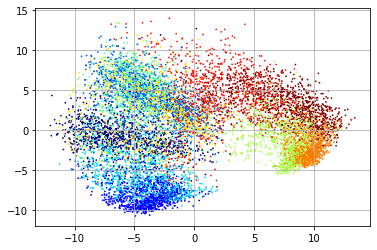

In [219]:
plt.scatter(z_visualizacion[:, 0], z_visualizacion[:, 1], s=0.5, c=y_test, cmap='jet')
plt.grid()